# SCRIPPS  / SOPAC Time series

## [http://sopac.ucsd.edu/index.shtml](http://sopac.ucsd.edu/index.shtml)

### [Data Explorer](http://geodemo-c.ucsd.edu/gridsphere/gridsphere?cid=Time+Series+Plots)


If your use of these data products results in a publication, please cite "Bock, Y. and F.H. Webb 2012. MEaSUREs Solid Earth Science ESDR System. La Jolla, California and Pasadena, California USA: [list archive from which data were obtained], [list dates of data used]. Digital media." and notify us of your publication.



In [28]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdate
import gpstools as gps

In [2]:
plt.style.use('seaborn-white')
#%matplotlib notebook
%matplotlib inline
%qtconsole

# Load time series

In [34]:
# We'll use station TPW2
station = 'TPW2'
refframe= 'ITRF2008/IGS08B'
# Reference frame is ITRF2008
# Download data
df = gps.jpl.load_timeseries(station)

In [35]:
df.head()

,decyear,east,north,up,sig_e,sig_n,sig_u,corr_en,corr_eu,corr_nu,julsec,year,month,day,hour,min,sec
2000-03-30,2000.243669,87.008,76.334,-13.477,1.533,1.739,6.470,99.789,-902.976,-179.242,7689600.0,2000,3,30,12,0,0
2000-03-31,2000.246407,87.985,76.863,-10.106,0.725,0.918,3.090,78.855,-700.831,-200.976,7776000.0,2000,3,31,12,0,0
2000-04-01,2000.249144,87.941,80.166,-9.475,0.713,0.903,2.988,76.931,-634.445,-170.802,7862400.0,2000,4,1,12,0,0
2000-04-02,2000.251882,85.087,78.485,-7.217,0.718,0.926,3.054,150.090,-807.213,-198.667,7948800.0,2000,4,2,12,0,0
2000-04-03,2000.254620,87.619,75.777,-4.294,0.702,0.880,2.937,66.631,-789.392,-171.744,8035200.0,2000,4,3,12,0,0


# Plot the time series

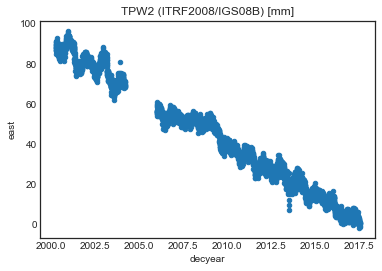

In [20]:
titlestr = '{} ({}) [mm]'.format(station, refframe)
ax = df.plot.scatter('decyear', 'east', title=titlestr)

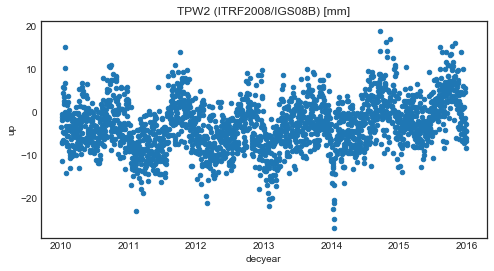

In [21]:
# Particular date range
df['2010/01/01':'2015/12/31'].plot.scatter('decyear', 'up', title=titlestr, figsize=(8,4))

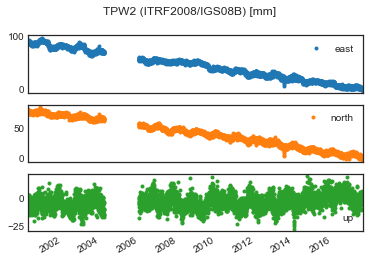

In [22]:
axes = df.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=titlestr)

# Fit velocity to timeseries

In [23]:
# Basic statistics for each component
df[ ['east', 'north', 'up'] ].describe()

,east,north,up
count,5564.000000,5564.000000,5564.000000
mean,43.060961,39.642937,-3.381912
std,25.988856,22.716223,6.046672
min,-2.005000,-2.367000,-27.033000
25%,21.094500,20.476500,-7.443750
50%,39.262500,38.747000,-3.575000
75%,58.443750,56.636750,0.603750
max,96.452000,84.818000,18.909000


In [24]:
dfF = gps.analysis.fit_linear(df)

In [25]:
# Table of values
for comp in ['east','north','up']:
    x = df.decyear
    y = df[comp]
    z,cov = np.polyfit(x, y, 1, cov=True)
    p = np.poly1d(z)
    #print(p)
    stderr = 2*np.sqrt(np.diag(cov))
    print('{}: {:.2f} +/- {:.2f} mm/yr'.format(comp, z[0], stderr[0]))
    residuals = (p(x) - y)
    rmse = np.sqrt((np.sum(residuals**2) / residuals.size))
    print('rmse = {:.2f}'.format(rmse))

east: -5.08 +/- 0.02 mm/yr
rmse = 3.38
north: -4.44 +/- 0.01 mm/yr
rmse = 2.83
up: 0.26 +/- 0.03 mm/yr
rmse = 5.90


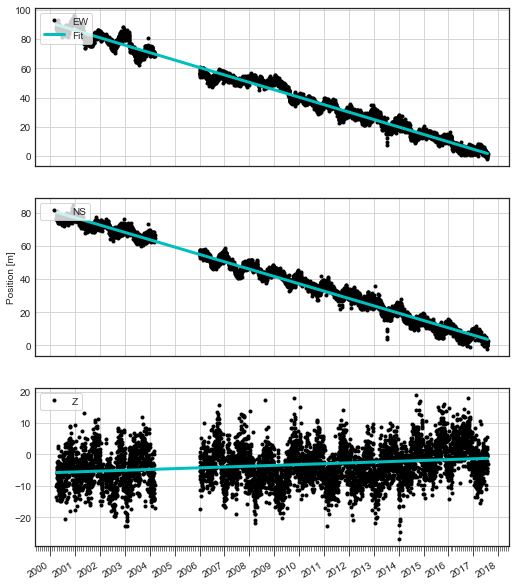

In [26]:
gps.plot.all(df,dfFit=dfF)